# Analysis on Film Production 

#### Business Problem
Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office.

#### Aim of the Project
The project aims to translate findings into actionable insights that the head of our company's new movie studio can use, to help decide what type of films to create. Our main goal as data scientists is to ensure the success of the company's new movie studio by offering the most approriate business advice.

#### Objectives;

1. Evaluate the impact of release timing.
2. To Identify the highly rated genre.
3. To analyze the performance of films in different budget ranges.
4. To identify the most produced genre by other producers.

#### Data Source
1. The data for this analysis is obtained from multiple reputable sources:
2. Box Office Mojo: Provides comprehensive box office revenue data.
3. IMDB: A rich source of movie ratings, genres, and other detailed movie information.
4. Rotten Tomatoes: Offers critical and audience reviews and ratings.
5. TheMovieDB: Contains detailed movie information, including genres, ratings, and runtime.
6. The Numbers: Provides financial data on movie budgets and grosses.

The data represents a comprehensive collection of information on films, including their financial performance, ratings, genres, and other attributes. The sample includes a diverse range of films across different genres, time periods, and budgets.



## 1. IMPORTING LIBRARIES & LOADING OF DATA

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### 1.1. Load and understand the 'bom.movie_gross' csv file

In [2]:
# Read csv file
bom = pd.read_csv('bom.movie_gross.csv')

In [3]:
bom.head(3)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


#### 1.2. Load and understand the 'tn.movie_budgets' csv file

In [4]:
# read movie budgets csv file
mb = pd.read_csv('tn.movie_budgets.csv')

In [5]:
mb.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"


In [6]:
#rename column for merging
mb = mb.rename(columns={"movie":  "title"})

In [7]:
# merge movie budgets and movie gross dfs
mb_mg = pd.merge(mb, bom, on = "title", how="left" )

In [8]:
mb_mg.head(3)

,id,release_date,title,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",NaN,NaN,NaN,NaN
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",BV,241100000.0,804600000,2011.0
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",NaN,NaN,NaN,NaN


We merged the movie budgets and movie gross dataframes as they had similar data.

#### 1.3. Load and understand the 'rt.reviews' tsv file

In [9]:
# read reviews csv
rvws = pd.read_csv('rt.reviews.tsv', sep='\t', encoding='ISO-8859-1')

In [10]:
rvws.head(3)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"


#### 1.4. Load and understand the 'tmdb.movie' csv file

In [11]:
tmdb= pd.read_csv('tmdb.movies.csv')

In [12]:
tmdb.head(3)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368


#### 1.5. Load and understand the 'rt.movie_info' tsv file

In [13]:
m_info= pd.read_csv('rt.movie_info.tsv', sep='\t', encoding='ISO-8859-1')

In [14]:
m_info.head(3)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN


#### 1.6. Connecting to the 'im.db' database file

In [15]:
#establish connection with database

conn = sqlite3.connect('im.db')

In [16]:
# Read and give information about the database
pd.read_sql('''
SELECT *
FROM sqlite_master
''', conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [17]:
#read data from database and join tables into 1 df
m_bsc = pd.read_sql('''
SELECT *
FROM movie_basics AS b
JOIN movie_ratings AS r
USING (movie_id)
''', conn)

In [18]:
m_bsc.head(3)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517


## 2. CLEANING THE DATA

#### 2.1 Cleaning the movie basics dataframe

In [19]:
# view columns
m_bsc.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes'],
      dtype='object')

In [20]:
m_bsc = m_bsc.drop(['start_year', 'runtime_minutes'], axis=1)

In [21]:
m_bsc.head(3)

,movie_id,primary_title,original_title,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,Drama,6.9,4517


In [22]:
#get null values
m_bsc.isnull().sum()

movie_id            0
primary_title       0
original_title      0
genres            804
averagerating       0
numvotes            0
dtype: int64

In [23]:
#drop rows with null values
m_bsc = m_bsc.dropna(subset=['genres'])

In [24]:
# split genres
m_bsc['genres'] = m_bsc['genres'].str.split(',')

# Explode genres into separate rows
m_bsc = m_bsc.explode('genres')
m_bsc

,movie_id,primary_title,original_title,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,Action,7.0,77
0,tt0063540,Sunghursh,Sunghursh,Crime,7.0,77
0,tt0063540,Sunghursh,Sunghursh,Drama,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,Biography,7.2,43
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,Drama,7.2,43
...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,Drama,8.7,136
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,Family,8.7,136
73853,tt9914642,Albatross,Albatross,Documentary,8.5,8


#### 2.2. Cleaning the mb_mg dataframe 


In [25]:
mb_mg.head(3)

,id,release_date,title,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",NaN,NaN,NaN,NaN
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",BV,241100000.0,804600000,2011.0
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",NaN,NaN,NaN,NaN


In [26]:
#drop irrelevant columns
mb_mg = mb_mg.drop(columns=['domestic_gross_y', 'foreign_gross','year', 'studio'])

In [27]:
#get mb_mg df info
mb_mg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   title              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross_x   5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 316.2+ KB


In [28]:
#convert the currency values to floats

mb_mg['production_budget'] = mb_mg['production_budget'].str.replace(',', '').str.replace('$','').astype(float)

mb_mg['worldwide_gross'] = mb_mg['worldwide_gross'].str.replace(',', '').str.replace('$','').astype(float)

mb_mg['domestic_gross'] = mb_mg['domestic_gross_x'].str.replace(',', '').str.replace('$','').astype(float)

In [29]:
#drop domestic_gross_x and id columns
mb_mg = mb_mg.drop(columns=['domestic_gross_x', 'id'])

In [30]:
# get total profit
mb_mg['profit_gross'] = mb_mg['worldwide_gross'] - mb_mg['production_budget']

In [31]:
mb_mg.head(10)

,release_date,title,production_budget,worldwide_gross,domestic_gross,profit_gross
0,"Dec 18, 2009",Avatar,425000000.0,2.776345e+09,760507625.0,2.351345e+09
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09,241063875.0,6.350639e+08
2,"Jun 7, 2019",Dark Phoenix,350000000.0,1.497624e+08,42762350.0,-2.002376e+08
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,1.403014e+09,459005868.0,1.072414e+09
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,1.316722e+09,620181382.0,9.997217e+08
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,2.053311e+09,936662225.0,1.747311e+09
6,"Apr 27, 2018",Avengers: Infinity War,300000000.0,2.048134e+09,678815482.0,1.748134e+09
7,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000.0,9.634204e+08,309420425.0,6.634204e+08
8,"Nov 17, 2017",Justice League,300000000.0,6.559452e+08,229024295.0,3.559452e+08
9,"Nov 6, 2015",Spectre,300000000.0,8.796209e+08,200074175.0,5.796209e+08


In [32]:
# Converting release_date to datetime
mb_mg['release_date'] = pd.to_datetime(mb_mg['release_date'], format='%b %d, %Y')

In [33]:
# Extracting year, month, and quarter from release_date
mb_mg['year'] = mb_mg['release_date'].dt.year
mb_mg['month'] = mb_mg['release_date'].dt.month

In [34]:
#drop release date
mb_mg = mb_mg.drop(columns=['release_date'])

In [35]:
#define function to group data into seasons
def seasons(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
         return 'Fall'
        
#get seasons column
mb_mg['season'] = mb_mg['month'].apply(seasons)

In [36]:
mb_mg.head(3)     

,title,production_budget,worldwide_gross,domestic_gross,profit_gross,year,month,season
0,Avatar,425000000.0,2.776345e+09,760507625.0,2.351345e+09,2009,12,Winter
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09,241063875.0,6.350639e+08,2011,5,Spring
2,Dark Phoenix,350000000.0,1.497624e+08,42762350.0,-2.002376e+08,2019,6,Summer


In [37]:
#top 10 performing movies
top_10_mov = mb_mg.sort_values(by=['profit_gross'], ascending = False).head(10)
top_10_mov

,title,production_budget,worldwide_gross,domestic_gross,profit_gross,year,month,season
0,Avatar,425000000.0,2.776345e+09,760507625.0,2.351345e+09,2009,12,Winter
42,Titanic,200000000.0,2.208208e+09,659363944.0,2.008208e+09,1997,12,Winter
6,Avengers: Infinity War,300000000.0,2.048134e+09,678815482.0,1.748134e+09,2018,4,Spring
5,Star Wars Ep. VII: The Force Awakens,306000000.0,2.053311e+09,936662225.0,1.747311e+09,2015,12,Winter
33,Jurassic World,215000000.0,1.648855e+09,652270625.0,1.433855e+09,2015,6,Summer
66,Furious 7,190000000.0,1.518723e+09,353007020.0,1.328723e+09,2015,4,Spring
26,The Avengers,225000000.0,1.517936e+09,623279547.0,1.292936e+09,2012,5,Spring
260,Harry Potter and the Deathly Hallows: Part II,125000000.0,1.341693e+09,381193157.0,1.216693e+09,2011,7,Summer
41,Black Panther,200000000.0,1.348258e+09,700059566.0,1.148258e+09,2018,2,Winter
112,Jurassic World: Fallen Kingdom,170000000.0,1.305773e+09,417719760.0,1.135773e+09,2018,6,Summer


#### 2.2 Cleaning the reviews dataframe 

In [38]:
#Check the shape of the reviews dataframe
rvws.shape

(54432, 8)

In [39]:
#Check for duplicates in the data
rvws.duplicated().sum()

9

In [40]:
#Drop the duplicates 
rvws.drop_duplicates(inplace = True)

In [41]:
#Checking if the duplicates have been dropped 
rvws.shape

(54423, 8)

In [42]:
#Checking for missing values 
rvws.isna().sum()

id                0
review         5556
rating        13516
fresh             0
critic         2713
top_critic        0
publisher       309
date              0
dtype: int64

In [43]:
#Replace the missing values with 0 
rvws.fillna(0, inplace =True)

In [44]:
#Check to ensure the missing values are dropped 
rvws.isna().sum()

id            0
review        0
rating        0
fresh         0
critic        0
top_critic    0
publisher     0
date          0
dtype: int64

#### 2.3 Cleaning the m_info dataframe

In [45]:
#Checking the coplumns 
m_info.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [46]:
#Check the shape of the dataframe
m_info.shape

(1560, 12)

In [47]:
m_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [48]:
#Checking for missing data 
m_info.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [49]:
#Drop the columns that we won't be using.
m_info = m_info.drop(columns=['theater_date', 'dvd_date','currency'])
m_info

,id,synopsis,rating,genre,director,writer,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,NaN,101 minutes,NaN


In [50]:
# subset genres
m_info = m_info.dropna(subset=['genre'])
# split genres
m_info['genre'] = m_info['genre'].str.split('|')

# Explode genres into separate rows
m_info = m_info.explode('genre')
m_info

,id,synopsis,rating,genre,director,writer,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure,William Friedkin,Ernest Tidyman,NaN,104 minutes,NaN
0,1,"This gritty, fast-paced, and innovative police...",R,Classics,William Friedkin,Ernest Tidyman,NaN,104 minutes,NaN
0,1,"This gritty, fast-paced, and innovative police...",R,Drama,William Friedkin,Ernest Tidyman,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama,David Cronenberg,David Cronenberg|Don DeLillo,"600,000",108 minutes,Entertainment One
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"600,000",108 minutes,Entertainment One
...,...,...,...,...,...,...,...,...,...
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure,NaN,Luc Besson,NaN,94 minutes,Columbia Pictures
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Art House and International,NaN,Luc Besson,NaN,94 minutes,Columbia Pictures
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Comedy,NaN,Luc Besson,NaN,94 minutes,Columbia Pictures
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Drama,NaN,Luc Besson,NaN,94 minutes,Columbia Pictures


#### 2.4 Cleaning the tmdb dataframe

In [51]:
#Checking the columns in the dataframe 
tmdb.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [52]:
#Getting an overview of the data.
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [53]:
tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [54]:
#Checking for null values.
tmdb.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [55]:
#Checking the shape of the dataframe
tmdb.shape


(26517, 10)

In [56]:
#Dropping the column Unnamed: 0 
tmdb = tmdb.drop(columns='Unnamed: 0')


In [57]:
tmdb.columns

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [58]:
#Checking the shape of the dataframe
tmdb.shape

(26517, 9)

##  3.  VISUALIZATION 

####  3.1. seasons bar graph by mean worldwide gross

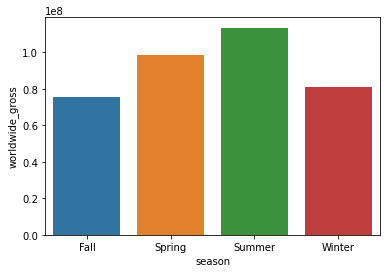

In [59]:
season_data =  mb_mg.groupby('season').agg({'worldwide_gross': 'mean'}).reset_index()
sns.barplot(x='season', y='worldwide_gross', data= season_data)
plt.show()

The visualization shows that most films do better during summer in terms of revenue, and worse during the fall.

#### 3.2. Correlation between the data in the mb_mg dataset

In [60]:
# check for correlation
data_corr = mb_mg.corr()
data_corr

,production_budget,worldwide_gross,domestic_gross,profit_gross,year,month
production_budget,1.000000,0.748306,0.685682,0.608752,0.176091,0.022575
worldwide_gross,0.748306,1.000000,0.938853,0.981811,0.100588,0.030288
domestic_gross,0.685682,0.938853,1.000000,0.926605,0.036690,0.028034
profit_gross,0.608752,0.981811,0.926605,1.000000,0.069903,0.029763
year,0.176091,0.100588,0.036690,0.069903,1.000000,-0.020533
month,0.022575,0.030288,0.028034,0.029763,-0.020533,1.000000


<AxesSubplot:>

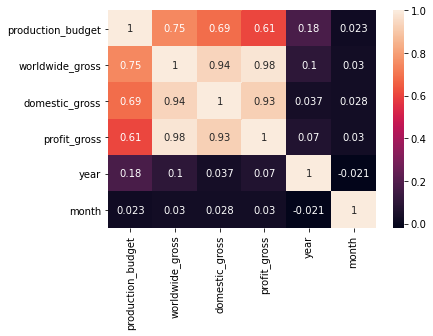

In [61]:
sns.heatmap(data = data_corr, annot = True )

The plot above shows how different columns in the mb_mg dataset relate to each other.

The lighter ones show a stronger relationship while the darker ones show weaker relationships

#### 3.3. Distribution of top 10 genres

In [62]:
#from the m_info data frame, we'll find the genre count.
genre_count = m_info['genre'].value_counts()[:10]

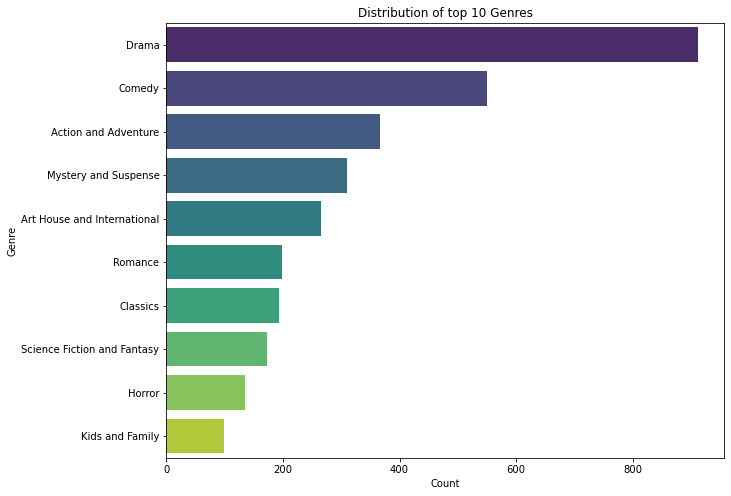

In [63]:
#plotting the top 10 genres per count
fig, ax = plt.subplots(figsize=(10,8))

#x
y = genre_count.index
#y
x = genre_count.values



sns.barplot(x=x,y=y, ax=ax, palette='viridis')
ax.set_ylabel('Genre')
ax.set_xlabel('Count')
ax.set_title('Distribution of top 10 Genres');


The above plot is a histogram showing the Distribution of the top 10 genres.

It shows that the drama genre has the highest count, followed by comedy then action and adventure and so on.

#### 3.4. A visualization of the average rating.

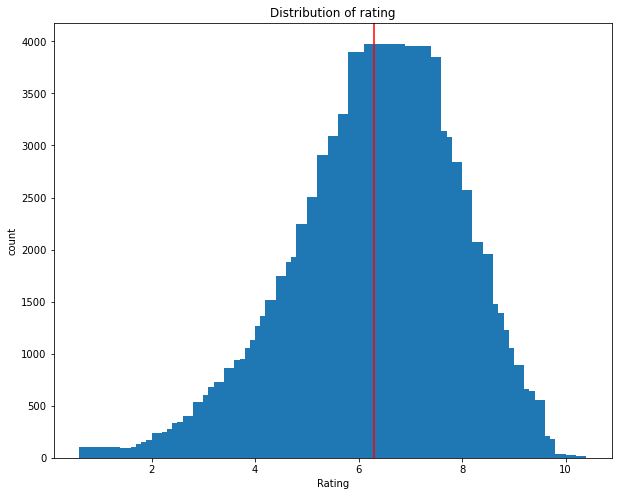

In [64]:
# plot a bar chart to viz the average rating

fig, ax = plt.subplots(figsize=(10,8))

# mean rating
mean_r = m_bsc['averagerating'].mean() # 5.81


ax.bar(m_bsc['averagerating'].value_counts().index, m_bsc['averagerating'].value_counts().values)
ax.axvline(x=mean_r, color='r')
ax.set_xlabel('Rating')
ax.set_ylabel('count')
ax.set_title('Distribution of rating');


The above plot shows that most films have a rating of 6.2

It also has a normal distribution.
This can serve as an independent variable in our simple linear regression model

#### 3.5. An Analysis of the performance of films in different budget ranges.

In [65]:
budget_data = mb_mg['production_budget']

In [66]:
# dividing the data into quantiles
q2 = budget_data.median()
q3 = budget_data.quantile(0.75)

print(q2)
print(q3)

17000000.0
40000000.0


In [67]:
# function to define budget ranges and categorize the films using the quantiles
def categorize_budget(budget):
    if budget < q2:
        return 'Low Budget'
    elif q2 <= budget < q3:
        return 'Mid Budget'
    else:
        return 'High Budget'

mb_mg['budget_range'] = mb_mg['production_budget'].apply(categorize_budget)
mb_mg['budget_range']
mb_mg

,title,production_budget,worldwide_gross,domestic_gross,profit_gross,year,month,season,budget_range
0,Avatar,425000000.0,2.776345e+09,760507625.0,2.351345e+09,2009,12,Winter,High Budget
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09,241063875.0,6.350639e+08,2011,5,Spring,High Budget
2,Dark Phoenix,350000000.0,1.497624e+08,42762350.0,-2.002376e+08,2019,6,Summer,High Budget
3,Avengers: Age of Ultron,330600000.0,1.403014e+09,459005868.0,1.072414e+09,2015,5,Spring,High Budget
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,1.316722e+09,620181382.0,9.997217e+08,2017,12,Winter,High Budget
...,...,...,...,...,...,...,...,...,...
5777,Red 11,7000.0,0.000000e+00,0.0,-7.000000e+03,2018,12,Winter,Low Budget
5778,Following,6000.0,2.404950e+05,48482.0,2.344950e+05,1999,4,Spring,Low Budget
5779,Return to the Land of Wonders,5000.0,1.338000e+03,1338.0,-3.662000e+03,2005,7,Summer,Low Budget
5780,A Plague So Pleasant,1400.0,0.000000e+00,0.0,-1.400000e+03,2015,9,Fall,Low Budget


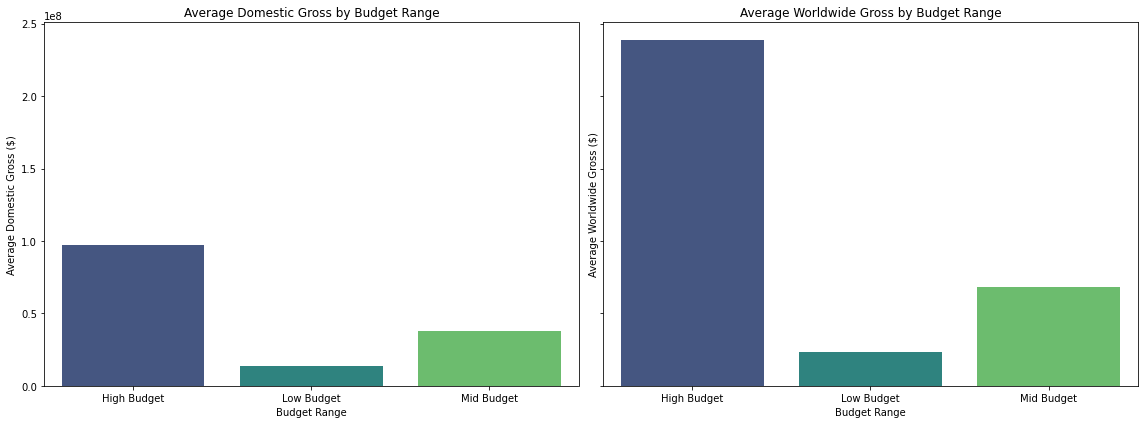

In [68]:
# Group by budget_range and aggregating by both mean and median for both domestic and worlwide gross
performance_by_budget = mb_mg.groupby('budget_range').agg({
    'domestic_gross': ['mean', 'median'],
    'worldwide_gross': ['mean', 'median']
}).reset_index()

# Renaming columns
performance_by_budget.columns = ['budget_range', 'avg_domestic_gross', 'median_domestic_gross', 'avg_worldwide_gross', 'median_worldwide_gross']

# Plotting performance metrics by budget range
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
# Domestic Gross
sns.barplot(x='budget_range', y='avg_domestic_gross', data=performance_by_budget, ax=axes[0], palette='viridis')
axes[0].set_title('Average Domestic Gross by Budget Range')
axes[0].set_ylabel('Average Domestic Gross ($)')
axes[0].set_xlabel('Budget Range')
# Worldwide Gross
sns.barplot(x='budget_range', y='avg_worldwide_gross', data=performance_by_budget, ax=axes[1], palette='viridis')
axes[1].set_title('Average Worldwide Gross by Budget Range')
axes[1].set_ylabel('Average Worldwide Gross ($)')
axes[1].set_xlabel('Budget Range')

plt.tight_layout()
plt.show()



The visualization above shows that the higher the production_budget the higher the returns in both the domestic and worldwide average gross.

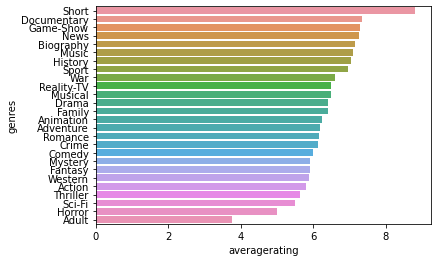

In [69]:
genre_data =  m_bsc.groupby('genres').agg({'averagerating': 'mean'}).reset_index().sort_values(by='averagerating', ascending=False)
sns.barplot(y='genres', x='averagerating', data= genre_data)
plt.show()

The bargraph above shows that short films recieve the highest rating followed by documentaries and Game shows respectively, while adult films have the least ratings 

## 4. MODELLING.

#### 4.1. Preparing modelling data


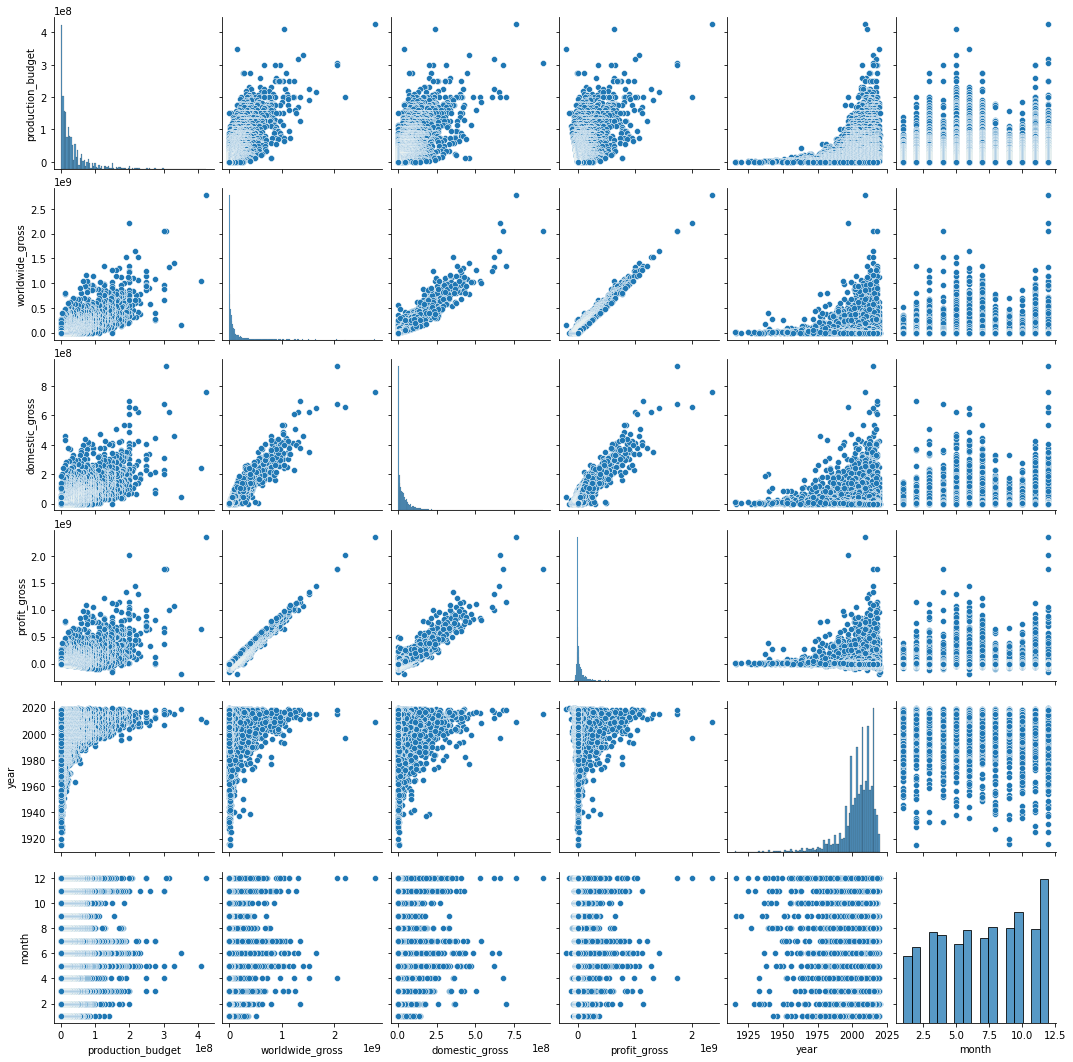

In [70]:
#Correlation of columns in the mb_mg dataframe
sns.pairplot(mb_mg)
plt.show()

The visualization above provides a comprehensive overview of the relationships among numerical variables in the mb_mg DataFrame, offering valuable insights for further analysis.

In [71]:
mb_mg.head(3)

,title,production_budget,worldwide_gross,domestic_gross,profit_gross,year,month,season,budget_range
0,Avatar,425000000.0,2.776345e+09,760507625.0,2.351345e+09,2009,12,Winter,High Budget
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09,241063875.0,6.350639e+08,2011,5,Spring,High Budget
2,Dark Phoenix,350000000.0,1.497624e+08,42762350.0,-2.002376e+08,2019,6,Summer,High Budget


<AxesSubplot:xlabel='production_budget', ylabel='profit_gross'>

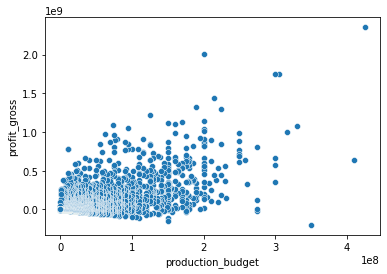

In [72]:
#Relationship between production budget and profit gross

sns.scatterplot(x='production_budget',y='profit_gross',data=mb_mg)

The resulting scatter plot shows the distribution of movies based on their production budget and profit gross. It shows a positive linear relationship between the two variables.

By analyzing the plot, you can identify potential trends, outliers, and correlations between the two variables.

<AxesSubplot:xlabel='profit_gross'>

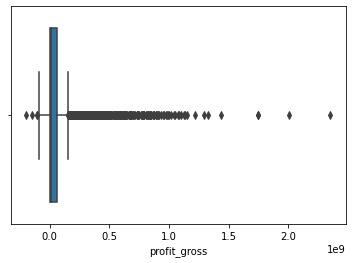

In [73]:
#using a box plot to check for negative values in the profit_gross column
sns.boxplot(mb_mg['profit_gross'])

 In the box plot above, it shows that there are a few negative values 

In [74]:
#Removing the negative values from the 'profit_gross' column
mb_mg = mb_mg[mb_mg['profit_gross'] >= 0]

<AxesSubplot:xlabel='profit_gross'>

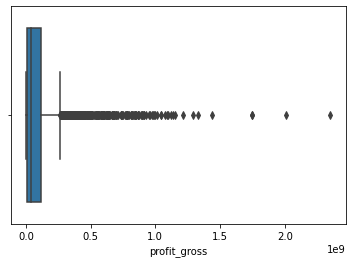

In [75]:
#checking if there are any other negative values
sns.boxplot(mb_mg['profit_gross'])

 The above box plot shows that there are no other negative values in the profit_gross column.

<AxesSubplot:xlabel='profit_gross', ylabel='Count'>

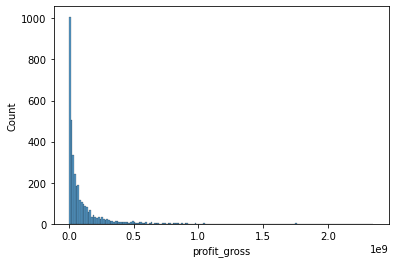

In [76]:
#Visualising a histogram to check if the profit_gross column is normally distributed
sns.histplot(mb_mg["profit_gross"])

 The data in the profit_gross column is not normally distributed. We can tell that from it's  shape.

<AxesSubplot:xlabel='profit_gross', ylabel='Count'>

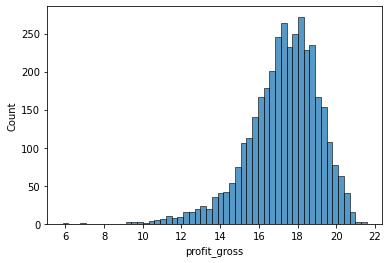

In [77]:
#We Transform the data to a normal distribution
norm_profit = np.log(mb_mg['profit_gross'])
sns.histplot(norm_profit)

Using Logarthimic transformation, we transformed the data into a normally distributed data

In [78]:
#Checking for any null values in the transformed data
norm_profit.isnull().sum()

0

<AxesSubplot:xlabel='production_budget', ylabel='Count'>

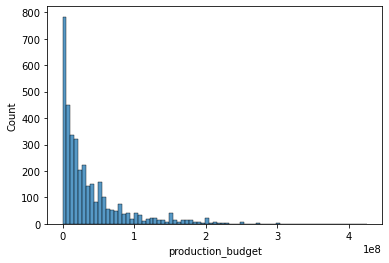

In [79]:
#Checking if the production_budget data is normally distributed.
sns.histplot(mb_mg["production_budget"])

The data is not normally distributed, and therefore it also needs transformation.

<AxesSubplot:xlabel='production_budget', ylabel='Count'>

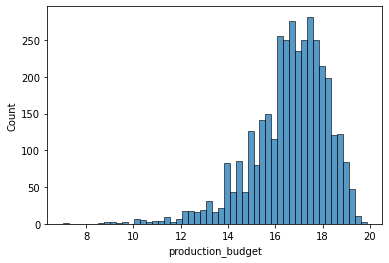

In [80]:
#We Transform the data to a normal distribution
norm_budget = np.log(mb_mg['production_budget'] + 1)
sns.histplot(norm_budget)

Also using logarthimic transformation, we transformed the data into a normally distributed data

In [81]:
#Checking if the norm budget data has any missing values.
norm_budget.isnull().sum()

0

#### 4.2. MODELING


In [82]:
#splitting our dataset into train and test splits
from sklearn.model_selection import train_test_split

x = norm_budget.values.reshape(-1, 1)
y = norm_profit.values
# Use 20% of the data as test
# The rest will be our training set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [83]:
#Building the model
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(x_train, y_train)


#display the intercept
print(reg.intercept_)

#display the coefficient
print(reg.coef_)

4.999259070440171
[0.73778484]


In [84]:
#comparing actual and predicted
profit_predict = reg.predict(x_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': profit_predict.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,732.000000,732.000000
mean,17.232326,17.250774
std,1.891960,1.251822
min,9.790263,11.531465
25%,16.185039,16.627796
50%,17.499223,17.472658
75%,18.543587,18.148683
max,21.281815,19.631842


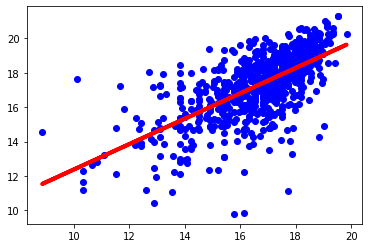

In [85]:
#Visualizing our results
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, profit_predict, color='red', linewidth=4)
plt.show()

This visualization compares the model's predictions (red line) with the actual profit values (blue dots) on the test set.

It shows that there is a positive linear relationship

In [86]:
#metrics of accuracy
from sklearn import metrics

# Our first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, profit_predict))

# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, profit_predict))

# Finally, the most popular metric: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, profit_predict)))

Mean Absolute Error: 1.0506213088097758
Mean Squared Error: 2.00110777444143
Root Mean Squared Error: 1.414605165564381


## 5. CONCLUSIONS AND RECOMMENDATIONS

### 5.1. CONCLUSIONS
1. By understanding the relationship between budget and box office performance, studios can make informed decisions about budget allocation and risk management.
2. By focusing on high-rated genres, studios can attract a wider audience and improve their chances of critical and commercial success.
3. Studio owners can optimize their release calendars by carefully considering release timing to maximize box office performance and minimize competition.


### 5.2 RECOMMENDATIONS
1. Utilize holidays and festive periods to attract a larger audience, that happens mostly during the summer
2. Focus on producing films in genres that consistently receive high ratings from critics and audiences.(Short films, Documentary and Game shows)
3. Invest in high-budget films with strong potential for high returns, while also exploring lower-budget films with lower risk.
4. Identify popular genres that are currently in demand and consider producing films in these genres.(drama  , comedy